<a href="https://colab.research.google.com/github/ktabata117/classmaterial_public/blob/master/text_mining_1_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ここから開始します**


Mecab install のおまじない
まずは、真下にある！apiで始まるMeCabと、OchasenをPCに準備する作業をして下さい。
そこしバグがあるようですので、それを修正しています。できあがったら、
!pip install mecab-python3 
でライブラリーをインストールします。
その上で、最後に、MOODLEにも書いた、
import MeCab
m = MeCab.Tagger("-Ochasen")
print(m.parse("今日は良い天気です"))
をやってみて下さい。

*   リスト項目
*   リスト項目


Ochasen のバグを修正

In [ ]:
# まずはこれをやって下さい。
!apt install mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3

# mecab-ipadic-NEologdのインストール
!apt install git make curl xz-utils file
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

# Ref: https://qiita.com/Fulltea/items/90f6ebe6dcceaf64eaef
# Ref: https://qiita.com/SUZUKI_Masaya/items/685000d569452585210c

!ln -s /etc/mecabrc /usr/local/etc/mecabrc
# Ref: https://qiita.com/Naritoshi/items/8f55d7d5cce9ce414395

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 34 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ub

In [ ]:
 #次がこれですよ。
 !pip install mecab-python3 

In [ ]:
import MeCab
m = MeCab.Tagger("-Ochasen")
print(m.parse("すもももももももものうち"))

すもも	スモモ	すもも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
の	ノ	の	助詞-連体化		
うち	ウチ	うち	名詞-非自立-副詞可能		
EOS



In [ ]:
# 宿題は" "の中を換えればできます。例えば、今日は良い天気です。⇒　最近、雨ばかりで嫌になります。　とか。
import MeCab
m = MeCab.Tagger("-Ochasen")
print(m.parse("今日は良い天気です"))

今日	キョウ	今日	名詞-副詞可能		
は	ハ	は	助詞-係助詞		
良い	ヨイ	良い	形容詞-自立	形容詞・アウオ段	基本形
天気	テンキ	天気	名詞-一般		
です	デス	です	助動詞	特殊・デス	基本形
EOS



**次は、ngram の特徴を理解しましょう。**

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-1  N-gram を切り出して出現回数を数えるプログラム例
from collections import Counter
import numpy as np
string = "吾輩は猫である"

delimiter = ['「', '」', '…', '　']
 
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ),  \
                  doublets)
 
triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
 
dic2 = Counter(doublets)
for k,v in sorted(dic2.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)
 
dic3 = Counter(triplets)
for k,v in sorted(dic3.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)


('吾', '輩') 1
('輩', 'は') 1
('は', '猫') 1
('猫', 'で') 1
('で', 'あ') 1
('あ', 'る') 1
('吾', '輩', 'は') 1
('輩', 'は', '猫') 1
('は', '猫', 'で') 1
('猫', 'で', 'あ') 1
('で', 'あ', 'る') 1


**応用　ここれは文章を作ろうとしています。今は、坊ちゃんを読み込ませて、Ngramの考え方を拡張して、○○個の繋がりのある文章を書かせようとしています。しかし、上手くいっていません。**

In [ ]:
import codecs

In [ ]:
zenbun = codecs.open('/content/sample_data/wagahaiwa_nekodearu.txt','r',"shift-jis")

In [ ]:
zenbun_all=zenbun.read()


In [ ]:
m = MeCab.Tagger('-Ochasen')

In [ ]:
parsed = m.parse(zenbun_all)
f = codecs.open("temp.txt", "w", "utf-8")
f.write(parsed)
f.close()

In [ ]:
# これを見ると、一体、何をしてきのか分かると思います。夏目漱石、坊ちゃんの文章を、分解し、それぞれに品詞をつけた、Ochasen型の文章に変換したわけです。
# そうすることで,Mgram や他のこと、次回やりたいネットワーク系の分析にかけることができる。本当はここから文章を作りたいのでTRYしている。
parsed

"吾輩\tワガハイ\t吾輩\t名詞-代名詞-一般\t\t\nは\tハ\tは\t助詞-係助詞\t\t\n猫\tネコ\t猫\t名詞-一般\t\t\nで\tデ\tだ\t助動詞\t特殊・ダ\t連用形\nある\tアル\tある\t助動詞\t五段・ラ行アル\t基本形\n\r\t\r\t\r\t記号-一般\t\t\n夏目\tナツメ\t夏目\t名詞-固有名詞-人名-姓\t\t\n漱石\tソウセキ\t漱石\t名詞-固有名詞-人名-名\t\t\n\r\t\r\t\r\t記号-一般\t\t\n\r\t\r\t\r\t記号-一般\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-\t-\t-\t名詞-サ変接続\t\t\n-------------------------\t-------------------------\t-------------------------\

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-2  JEITA コーパスから単語 N-gram 頻度データを生成するプログラム例
from collections import Counter
import numpy as np
from numpy.random import *
import nltk
from nltk.corpus.reader.chasen import *

# JEITAコーパスデータの読み込み
jeita = ChasenCorpusReader('.', 'temp.txt', encoding='utf-8')

delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト
string = jeita.words()
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), \
                   doublets)

triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
dic2 = Counter(doublets)  # 2-gramの出現回数リスト
dic3 = Counter(triplets)  # 3-gramの出現回数リスト
for u,v in dic2.items():
    print(u, v)
for u,v in dic3.items():
    print(u, v)

def gennext(words, dic):  # N-gram辞書dicと直前の1語/2語から、次の語を選んで返す
    grams = len(words)    # 2-gramか3-gramかを、与えたwordが2語か3語かによって決める
    if grams==2:
        matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]),
              dic.items() )) )  # 2-gramの第2項がほしい語words[1]であるものを集める
    else:
        matcheditems = np.array(list(filter(
             # 3-gramの第2・3項がほしい語words[1], words[2]であるものを集める
             (lambda x: x[0][0] == words[1]) and (lambda x: x[0][1] == words[2]),
              dic.items() )) )
    if (len(matcheditems) == 0):  # ほしい語のパターンがN-gram辞書にない場合は中止する
        print("No matched generator for", words[1])
        return ''
    probs = [row[1] for row in matcheditems]      # N-gram辞書の出現回数部分を取り出す
    weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに掛ける
    if grams==2:
        # 重み最大になる2-gramの2語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][1]
    else:
        # 重み最大になる3-gramの3語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][2]
    return u
# 以下メインプログラム 
#words = ['', '猫']       # 2-gramのときの初期シーケンス
words = ['', '吾輩', 'の']  # 3-gramのときの初期シーケンス
output = words[1:]          # 出力outputの先頭に初期シーケンスを埋め込む
for i in range(50):         # 最大で50語まで生成（「。」などが来れば停止）
    if len(words) == 2:
        newword = gennext(words, dic2)     # 2-gram時の次の語の生成
    else:
        newword = gennext(words, dic3)     # 3-gram時の次の語の生成
    output.append(newword)                 # 出力シーケンスoutputに次の語を加える
    if newword in ['', '。', '？', '！']:  # 次の語が終端なら生成終了
        break
    words = output[-len(words):]           # 次のgentextの入力を準備する
for u in output:
    print(u, end='')
print()


ストリーミング出力は最後の 5000 行に切り捨てられました。
('一家', '一門', '《') 1
('一門', '《', 'いっ') 1
('いっ', 'け', 'いち') 1
('け', 'いち', 'もん') 1
('もん', '》', 'ことごとく') 1
('》', 'ことごとく', '一') 1
('ことごとく', '一', '軒') 1
('一', '軒', 'の') 1
('軒', 'の', 'うち') 1
('うち', 'に', 'ごろごろ') 1
('いる', '。', '主張') 1
('。', '主張', 'す') 1
('主張', 'す', 'べき') 1
('す', 'べき', '個性') 1
('べき', '個性', 'も') 1
('個性', 'も', 'なく') 1
('なく', '、', 'あっ') 1
('、', 'あっ', 'て') 1
('て', 'も', '主張') 1
('も', '主張', 'し') 1
('主張', 'し', 'ない') 1
('で', '済む', 'の') 1
('済む', 'の', 'だ') 1
('だ', 'が', '文明') 1
('文明', 'の', '民') 1
('の', '民', 'は') 1
('民', 'は', 'たとい') 1
('は', 'たとい', '親子') 1
('たとい', '親子', 'の') 1
('親子', 'の', '間') 1
('の', '間', 'で') 1
('間', 'で', 'も') 1
('で', 'も', 'お') 1
('も', 'お', '互に') 1
('お', '互に', '我儘') 1
('互に', '我儘', '《') 1
('》', 'を', '張れる') 1
('を', '張れる', 'だけ') 1
('張れる', 'だけ', '張ら') 1
('だけ', '張ら', 'なけれ') 1
('張ら', 'なけれ', 'ば') 1
('なけれ', 'ば', '損') 1
('ば', '損', 'に') 1
('なる', 'から', '勢') 1
('から', '勢', '《') 1
('勢', '《', 'いき') 1
('《', 'いき', 'お') 1
('いき', 'お', '》') 1
('》', 'い', '両者') 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


以下は私の苦闘しているプログラムの残骸ですね。例えば、吾輩は猫であるを、青空文庫からダウンロードしてきて、分析しています。とりあえず、残しておきますが、無視して下さい。

In [ ]:
import re
import os
class Aozora:
    decoration = re.compile(r"(［[^［］]*］)|(《[^《》]*》)|[｜\n]")
    def __init__(self, filename):
        self.filename = filename
        # 青空文庫はShift-JISなので
        with open(filename, "r", encoding="shift-jis") as afile:
            self.whole_str = afile.read()
        paragraphs = self.whole_str.splitlines()
        # 最後の3行の空白行以降のコメント行を除く
        c = 0
        position = 0
        for (i, u) in enumerate(reversed(paragraphs)):
            if len(u) != 0:
                c = 0
            else:
                c += 1
                if c >= 3:
                    position = i
                    break
        if position != 0:
            paragraphs = paragraphs[:-(position+1)]
 
        # 先頭の----行で囲まれたコメント領域の行を除く
        newparagraphs = []
        addswitch = True
        for u in paragraphs:
            if u[:2] != '--':
                if addswitch:
                    newparagraphs.append(u)
            else:
                addswitch = not addswitch
 
        self.cleanedparagraphs = []
        for u in newparagraphs:
            v = re.sub(self.decoration, '', u)
            self.cleanedparagraphs.append(v)
 
    def read(self):
        return self.cleanedparagraphs


In [ ]:
aozora = Aozora("/content/sample_data/wagahaiwa_nekodearu.txt")
for u in aozora.read():
    # パラグラフuごとの処理
 x1=print(u)

  

吾輩は猫である
夏目漱石


一

　吾輩は猫である。名前はまだ無い。
　どこで生れたかとんと見当がつかぬ。何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。吾輩はここで始めて人間というものを見た。しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。この書生というのは時々我々を捕えて煮て食うという話である。しかしその当時は何という考もなかったから別段恐しいとも思わなかった。ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである。掌の上で少し落ちついて書生の顔を見たのがいわゆる人間というものの見始であろう。この時妙なものだと思った感じが今でも残っている。第一毛をもって装飾されべきはずの顔がつるつるしてまるで薬缶だ。その後猫にもだいぶ逢ったがこんな片輪には一度も出会わした事がない。のみならず顔の真中があまりに突起している。そうしてその穴の中から時々ぷうぷうと煙を吹く。どうも咽せぽくて実に弱った。これが人間の飲む煙草というものである事はようやくこの頃知った。
　この書生の掌の裏でしばらくはよい心持に坐っておったが、しばらくすると非常な速力で運転し始めた。書生が動くのか自分だけが動くのか分らないが無暗に眼が廻る。胸が悪くなる。到底助からないと思っていると、どさりと音がして眼から火が出た。それまでは記憶しているがあとは何の事やらいくら考え出そうとしても分らない。
　ふと気が付いて見ると書生はいない。たくさんおった兄弟が一疋も見えぬ。肝心の母親さえ姿を隠してしまった。その上今までの所とは違って無暗に明るい。眼を明いていられぬくらいだ。はてな何でも容子がおかしいと、のそのそ這い出して見ると非常に痛い。吾輩は藁の上から急に笹原の中へ棄てられたのである。
　ようやくの思いで笹原を這い出すと向うに大きな池がある。吾輩は池の前に坐ってどうしたらよかろうと考えて見た。別にこれという分別も出ない。しばらくして泣いたら書生がまた迎に来てくれるかと考え付いた。ニャー、ニャーと試みにやって見たが誰も来ない。そのうち池の上をさらさらと風が渡って日が暮れかかる。腹が非常に減って来た。泣きたくても声が出ない。仕方がない、何でもよいから食物のある所まであるこうと決心をしてそろりそろりと池を左りに廻り始めた。どうも非常に苦しい。そこを

In [ ]:
Aozora

__main__.Aozora

In [ ]:
import re
import numpy as np

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 3.0MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=89823a7cb3255275180a7b5a461a05d140ebf57b8102dbfc35a6774726c3012d
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built japanize-matplotlib


In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib 

In [ ]:
!apt-get -y install fonts-ipafont-gothic
# matplotlibのキャッシュをクリア
!rm /root/.cache/matplotlib/fontlist-v300.json

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
rm: cannot remove '/root/.cache/matplotlib/fontlist-v300.json': No such file or directory


In [ ]:
string = '\n'.join(aozora.read())

In [ ]:
string = re.sub('　', '', string)
string = re.split('。(?!」)|\n', re.sub('　', '', string))
while '' in string:  string.remove('')  # 空行を除く
m = MeCab.Tagger("-Ochasen")            # MeCabで品詞分解する

In [ ]:
lengthlist = np.array( [len(v) for v in string][1:43] )
print('average', lengthlist.mean())
print('variance', lengthlist.var())
print('std-deviation', lengthlist.std())
for u in lengthlist: print(u)           # それぞれの文の長さを、出現順に表示
for u in sorted(lengthlist): print(u)   # それぞれの文の長さを、長さ順に表示


average 23.166666666666668
variance 134.234126984127
std-deviation 11.585945234814766
4
1
7
7
16
35
19
35
28
33
43
38
23
30
32
20
22
13
30
46
28
6
30
36
16
16
16
19
13
32
24
26
25
13
29
22
25
10
11
48
9
37
1
4
6
7
7
9
10
11
13
13
13
16
16
16
16
19
19
20
22
22
23
24
25
25
26
28
28
29
30
30
30
32
32
33
35
35
36
37
38
43
46
48


findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38263 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_ag

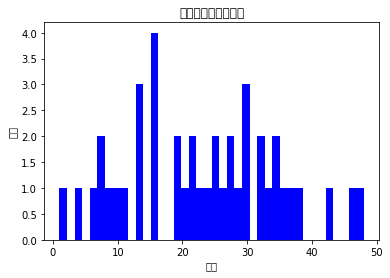

In [ ]:
plt.rcParams['font.family'] = 'IPAGothic'
fig = plt.figure()
plt.title('文の長さ（文字数）')
plt.xlabel('長さ')
plt.ylabel('頻度')
plt.hist(lengthlist, color='blue', bins=40)  # binsでヒストグラムの横軸区分数を指定 
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-2  JEITA コーパスから単語 N-gram 頻度データを生成するプログラム例
from collections import Counter
import numpy as np
from numpy.random import *
import nltk
from nltk.corpus.reader.chasen import *

# JEITAコーパスデータの読み込み
jeita = ChasenCorpusReader('.', 'temp.txt', encoding='utf-8')

delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト
string = jeita.words()
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), \
                   doublets)

triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
dic2 = Counter(doublets)  # 2-gramの出現回数リスト
dic3 = Counter(triplets)  # 3-gramの出現回数リスト
for u,v in dic2.items():
    print(u, v)
for u,v in dic3.items():
    print(u, v)

def gennext(words, dic):  # N-gram辞書dicと直前の1語/2語から、次の語を選んで返す
    grams = len(words)    # 2-gramか3-gramかを、与えたwordが2語か3語かによって決める
    if grams==2:
        matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]),
              dic.items() )) )  # 2-gramの第2項がほしい語words[1]であるものを集める
    else:
        matcheditems = np.array(list(filter(
             # 3-gramの第2・3項がほしい語words[1], words[2]であるものを集める
             (lambda x: x[0][0] == words[1]) and (lambda x: x[0][1] == words[2]),
              dic.items() )) )
    if (len(matcheditems) == 0):  # ほしい語のパターンがN-gram辞書にない場合は中止する
        print("No matched generator for", words[1])
        return ''
    probs = [row[1] for row in matcheditems]      # N-gram辞書の出現回数部分を取り出す
    weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに掛ける
    if grams==2:
        # 重み最大になる2-gramの2語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][1]
    else:
        # 重み最大になる3-gramの3語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][2]
    return u
# 以下メインプログラム 
#words = ['', '子規']       # 2-gramのときの初期シーケンス
words = ['', '子規', 'の']  # 3-gramのときの初期シーケンス
output = words[1:]          # 出力outputの先頭に初期シーケンスを埋め込む
for i in range(50):         # 最大で50語まで生成（「。」などが来れば停止）
    if len(words) == 2:
        newword = gennext(words, dic2)     # 2-gram時の次の語の生成
    else:
        newword = gennext(words, dic3)     # 3-gram時の次の語の生成
    output.append(newword)                 # 出力シーケンスoutputに次の語を加える
    if newword in ['', '。', '？', '！']:  # 次の語が終端なら生成終了
        break
    words = output[-len(words):]           # 次のgentextの入力を準備する
for u in output:
    print(u, end='')
print()


ValueError: ignored

いよいよ、夏目漱石を分析開始

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12370 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22259 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36649 missing from current font.
  font.set_

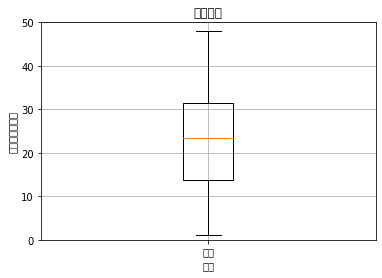

In [ ]:
# 箱ひげ図を作る
plt.boxplot(lengthlist)
plt.xticks([1], ['吾輩'])
plt.title('箱ひげ図')
plt.grid()
plt.xlabel('文書')
plt.ylabel('文の長さの頻度')
plt.ylim([0,50])
plt.show()


In [ ]:
zenbun_all=

In [ ]:
import MeCab
m = MeCab.Tagger("-Ochasen")
print(m.parse("しなきゃなんて嘘さ"))

し	シ	する	動詞-自立	サ変・スル	未然形
なきゃ	ナキャ	ない	助動詞	特殊・ナイ	仮定縮約２
なんて	ナンテ	なんて	助詞-副助詞		
嘘	ウソ	嘘	名詞-一般		
さ	サ	さ	助詞-終助詞		
EOS



In [ ]:
import MeCab
m = MeCab.Tagger("-Ochasen")
print(m.parse("すもももももももものうち"))


すもも	スモモ	すもも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
も	モ	も	助詞-係助詞		
もも	モモ	もも	名詞-一般		
の	ノ	の	助詞-連体化		
うち	ウチ	うち	名詞-非自立-副詞可能		
EOS

